# 🛍️ Customer Segmentation using K-Means Clustering

This project segments customers into meaningful groups based on Age, Annual Income, and Spending Score using K-Means clustering.

## 📂 Dataset
- Source: Mall_Customers.csv
- Features Used: Age, Annual Income (k$), Spending Score (1-100)

## 🧪 Techniques Used
- Data Preprocessing
- Elbow Method to find optimal K
- Silhouette Score validation
- K-Means Clustering
- PCA for Visualization
- Pair Plot & Heatmap for insights

## 📊 Visualizations
- PCA scatter plot
- Elbow curve
- Pair plot
- Heatmap
- Centroid markers

## 🧠 Recommendations
- Cluster-wise marketing strategies for high-value and budget-conscious customers

## 📁 Files Included
- Clustering_Notebook.ipynb
- Customer_Segmentation_Report.pdf
- Mall_Customers.csv

## 🚀 Author
**Sravya Keerthana** – [LinkedIn link if you want to include]





In [1]:
# Step 1: Libraries & Data Load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv('/content/Mall_Customers.csv')  # Upload this file
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Basic info
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())

# Missing values
print("\nMissing values:\n", df.isnull().sum())

# Summary
df.describe()


Shape: (200, 5)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# Selecting relevant features for clustering
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

# Standardizing features (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


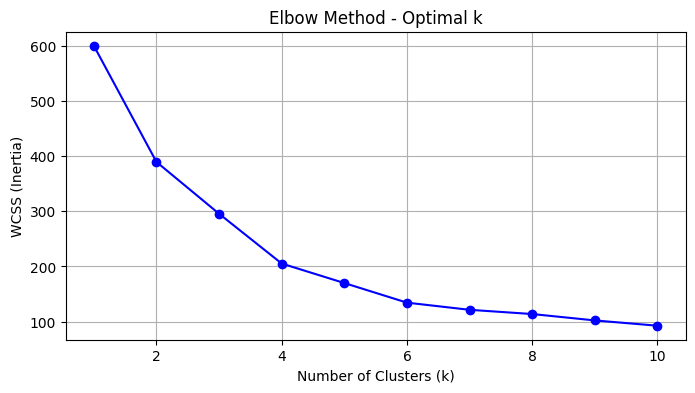

In [7]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method - Optimal k')
plt.grid()
plt.show()


In [8]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score for k={k}: {score:.3f}")



Silhouette Score for k=2: 0.335
Silhouette Score for k=3: 0.358
Silhouette Score for k=4: 0.404
Silhouette Score for k=5: 0.408
Silhouette Score for k=6: 0.431
Silhouette Score for k=7: 0.410
Silhouette Score for k=8: 0.367
Silhouette Score for k=9: 0.374
Silhouette Score for k=10: 0.362


In [9]:
# Set the best k from above (e.g., 5)
k_opt = 5
kmeans = KMeans(n_clusters=k_opt, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Show dataset with cluster column
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


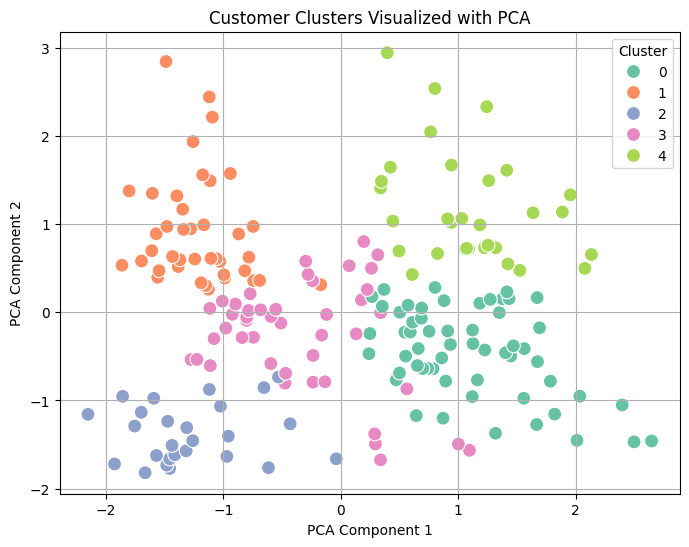

In [10]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1],
                hue=df['Cluster'], palette='Set2', s=100)
plt.title('Customer Clusters Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()


/tmp/ipython-input-13-1210166273.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pairplot_data['Cluster'] = pairplot_data['Cluster'].astype(str)


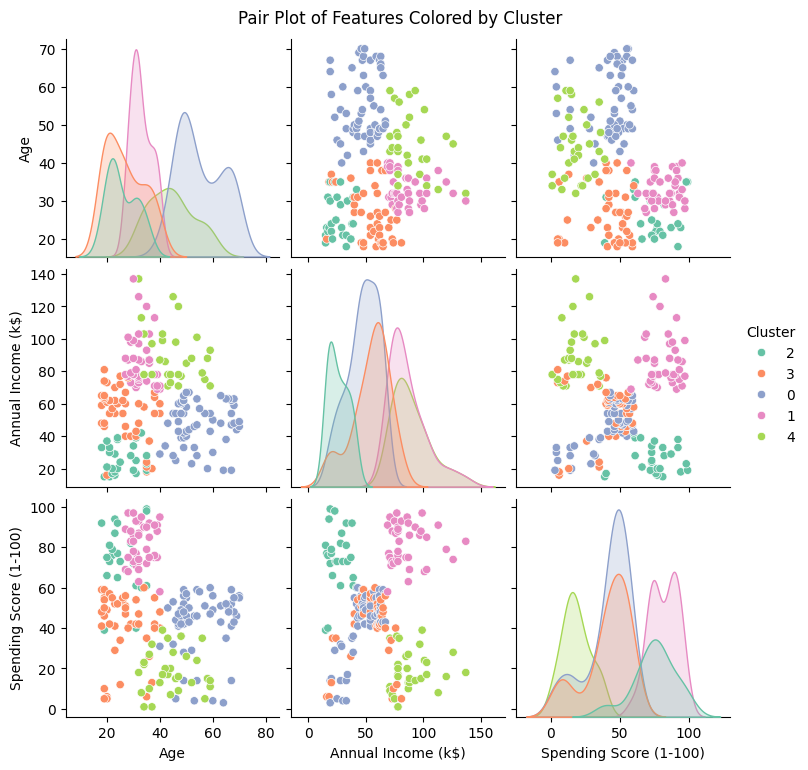

In [13]:
# For pair plot, we need all features + cluster
pairplot_data = df[features + ['Cluster']]

# Convert cluster to string to show legend properly
pairplot_data['Cluster'] = pairplot_data['Cluster'].astype(str)

# Plot pairplot
sns.pairplot(pairplot_data, hue='Cluster', palette='Set2')
plt.suptitle("Pair Plot of Features Colored by Cluster", y=1.02)
plt.show()


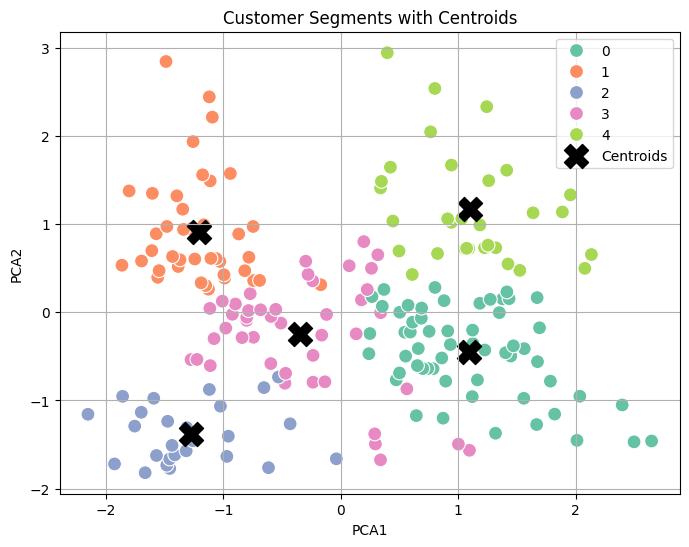

In [14]:
# Calculate PCA again (if needed)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

# Add PCA components and cluster to DataFrame
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

# Get centroids in PCA space
centroids = pd.DataFrame(pca.transform(kmeans.cluster_centers_), columns=['PCA1', 'PCA2'])

# Plot clusters + centroids
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.scatter(centroids['PCA1'], centroids['PCA2'], s=300, c='black', marker='X', label='Centroids')
plt.title('Customer Segments with Centroids')
plt.legend()
plt.grid()
plt.show()


           Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                   
0        55.28               47.62                   41.71
1        32.88               86.10                   81.53
2        25.77               26.12                   74.85
3        26.73               54.31                   40.91
4        44.39               89.77                   18.48


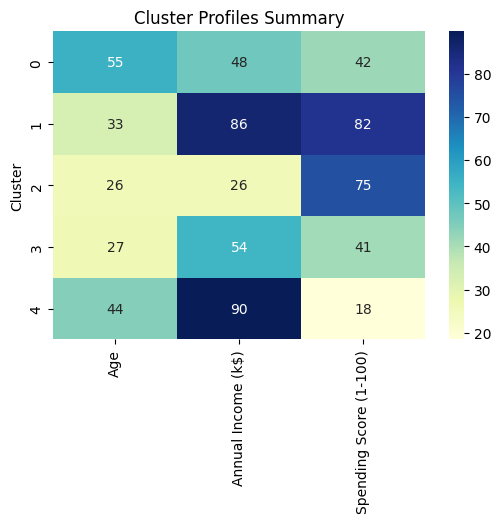

In [12]:
# Average characteristics of each cluster
summary = df.groupby('Cluster')[features].mean().round(2)
print(summary)

# Heatmap for easy comparison
plt.figure(figsize=(6, 4))
sns.heatmap(summary, annot=True, cmap='YlGnBu')
plt.title('Cluster Profiles Summary')
plt.show()


💡 Sample Business Recommendations:
Cluster 0: Younger customers with high spending — best group to promote premium and trendy products.

Cluster 1: Middle-aged customers with high income but lower spending — consider exclusive deals or loyalty programs.

Cluster 2: Older customers with moderate income — can be targeted with budget-friendly options.

Cluster 3: Customers with low income and spending — good candidates for seasonal discounts or group offers.

Cluster 4: High-income customers with very high spending — ideal for VIP services, early access, or luxury promotions.